#  **Project: Capstone Project 2– part2**

** *This notebook is part 2 of 4. please follow the sequence **

** Capstone 2 Project - Sentiment Analysis from Twitter #citibike and #bikeNYC **

** Prerequite:- please run notebook 1 and that will create the csv file required in data folder.

# Data Visualization and Exploratory Data Analysis:-

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import matplotlib.patches as mpatches
import matplotlib.lines as lines
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()


In [2]:
#import data into Dataframe

df_sub = pd.DataFrame(pd.read_csv('../data/df_sub_DV.csv'))
df_temp = pd.DataFrame(pd.read_csv('../data/df_temp_DV.csv'))
trip_bymonth = pd.DataFrame(pd.read_csv('../data/df_trip_bymonth_DV.csv'))
df_summ = pd.DataFrame(pd.read_csv('../data/df_summ_DV.csv'))
df_cust = pd.DataFrame(pd.read_csv('../data/df_cust_DV.csv'))

print("df_sub :", df_sub.shape)
print("df_temp :", df_temp.shape)
print("trip_bymonth :", trip_bymonth.shape)
print("df_summ :", df_summ.shape)

df_sub : (3726266, 23)
df_temp : (92, 6)
trip_bymonth : (3, 17)
df_summ : (92, 8)


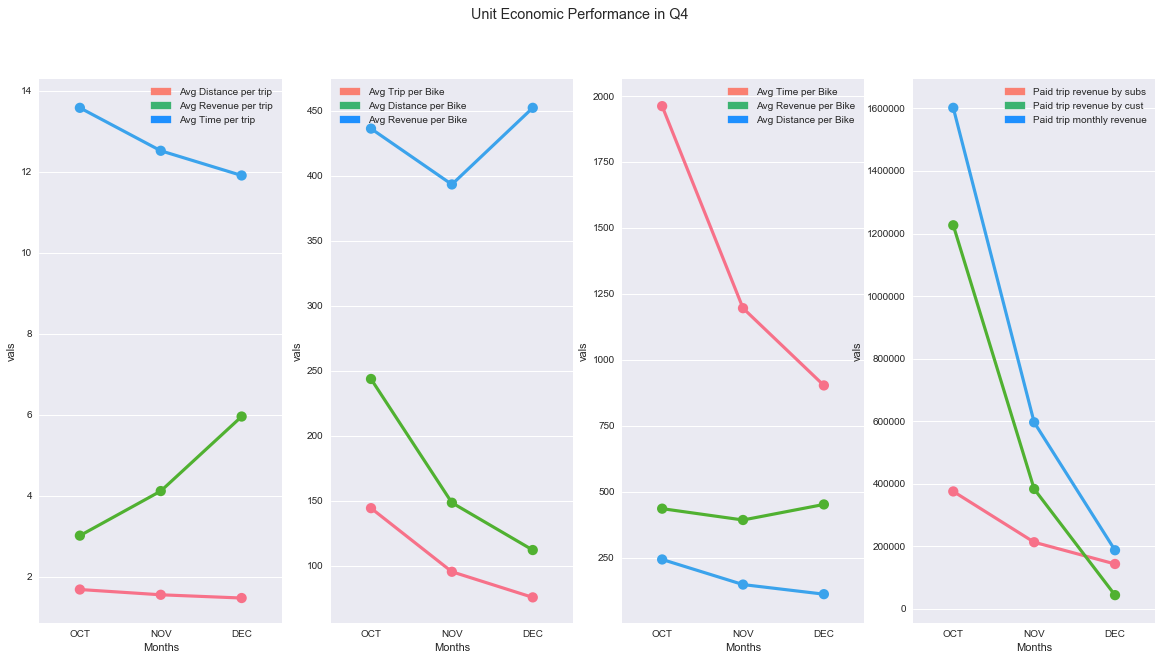

In [3]:
# Plot Key unit metrics per trip and per bike for each month

df = trip_bymonth[['month','avg_dis_per_trip','avg_reven_per_trip','avg_time_per_trip']]
df1 = df.melt('month', var_name='cols',  value_name='vals')

df = trip_bymonth[['month','avg_trip_per_bike','avg_dis_per_bike','avg_reven_per_bike']]
df2 = df.melt('month', var_name='cols',  value_name='vals')

df = trip_bymonth[['month','avg_time_per_bike','avg_reven_per_bike','avg_dis_per_bike']]
df3 = df.melt('month', var_name='cols',  value_name='vals')

df = trip_bymonth[['month','paid_trip_revenue_bysubs','paid_trip_revenue_bycust','paid_trip_monthly_revenue']]
df4 = df.melt('month', var_name='cols',  value_name='vals')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

sns.factorplot(x="month", y="vals", hue='cols', data=df1, palette="husl", ax=ax1, legend = False)
sns.factorplot(x="month", y="vals", hue='cols', data=df2, palette="husl", ax=ax2, legend = False)
sns.factorplot(x="month", y="vals", hue='cols', data=df3, palette="husl", ax=ax3, legend = False)
sns.factorplot(x="month", y="vals", hue='cols', data=df4, palette="husl", ax=ax4, legend = False)

ax1.set_xlabel("Months")
lab1 = mpatches.Patch(color='salmon', label='Avg Distance per trip')
lab2 = mpatches.Patch(color='mediumseagreen', label='Avg Revenue per trip')
lab3 = mpatches.Patch(color='dodgerblue', label='Avg Time per trip')
ax1.legend(handles=[lab1,lab2, lab3], loc=1)

ax2.set_xlabel("Months")
lab1 = mpatches.Patch(color='salmon', label='Avg Trip per Bike')
lab2 = mpatches.Patch(color='mediumseagreen', label='Avg Distance per Bike')
lab3 = mpatches.Patch(color='dodgerblue', label='Avg Revenue per Bike')
ax2.legend(handles=[lab1,lab2, lab3], loc=2)

ax3.set_xlabel("Months")
lab1 = mpatches.Patch(color='salmon', label='Avg Time per Bike')
lab2 = mpatches.Patch(color='mediumseagreen', label='Avg Revenue per Bike')
lab3 = mpatches.Patch(color='dodgerblue', label='Avg Distance per Bike')
ax3.legend(handles=[lab1,lab2, lab3], loc=1)

ax4.set_xlabel("Months")
lab1 = mpatches.Patch(color='salmon', label='Paid trip revenue by subs')
lab2 = mpatches.Patch(color='mediumseagreen', label='Paid trip revenue by cust')
lab3 = mpatches.Patch(color='dodgerblue', label='Paid trip monthly revenue')
ax4.legend(handles=[lab1,lab2, lab3], loc=1)

fig.suptitle('Unit Economic Performance in Q4')

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)


###### **December month have seen less number of trips anfd hence the trip and distance per bike decreased but revenue per bike has increased.

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


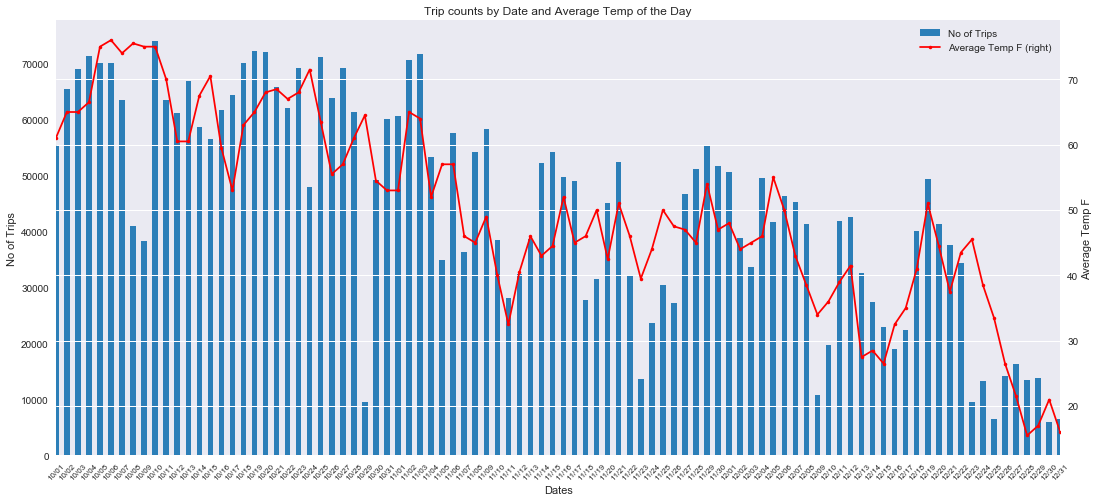

In [4]:
# Plot No oftrips happened each day of Q4 and plot it with the average temp for each day

newdf_c = df_sub.groupby(['startdate']).agg({'trip_id':{'counts': 'count'}})

ax1 = df_summ.Trips.plot(kind = 'bar', figsize=(18, 8), color='#2c7fb8', linewidth=.01, label="No of Trips", legend=True)
ax2 = df_temp.AVGT.plot(secondary_y=True, marker='.', label="Average Temp F", color='red', legend=True)

ax1.set_xticklabels(labels=pd.to_datetime(df_summ['Date']).dt.strftime('%m/%d'), fontdict={'fontsize':8}, rotation=45)
ax1.set_xlabel("Dates")
ax1.set_ylabel("No of Trips")
ax2.set_ylabel("Average Temp F")

plt.title('Trip counts by Date and Average Temp of the Day')

plt.show()

###### ** Temperature is a big factor for people to take a bike trip. on the colder days the bike trips were dropped significantly.

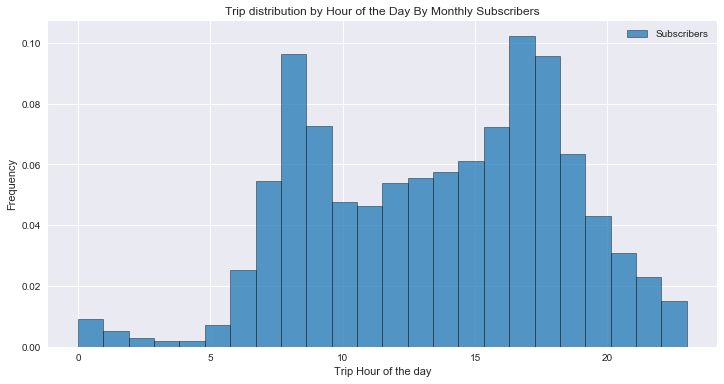

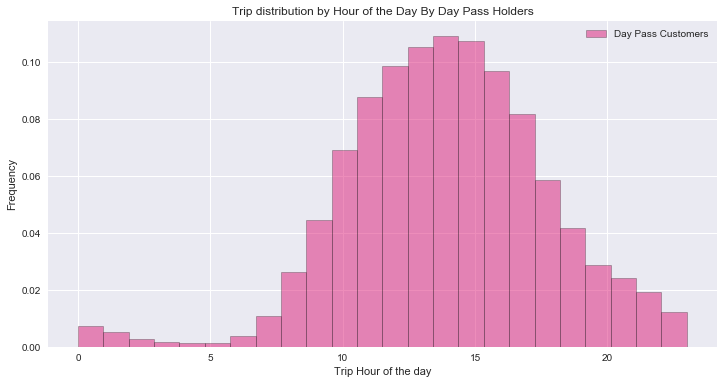

In [5]:
# Plot trip distribution by hour of the day in entire Q4 for subscriber

plt.figure(figsize=(12,6))
df_sub['starthour'].plot('hist', legend=True, normed=True, color='#2c7fb8', alpha = 0.8, label="Subscribers", edgecolor='black', linewidth=.5, bins=24)
_ = plt.xlabel('Trip Hour of the day')
_ = plt.ylabel('Frequency')
_ = plt.title('Trip distribution by Hour of the Day By Monthly Subscribers')

plt.show()


plt.figure(figsize=(12,6))
df_cust['starthour'].plot('hist', legend=True, normed=True, color='#dd1c77', alpha = 0.5, label="Day Pass Customers", edgecolor='black', linewidth=.5, bins=24)
_ = plt.xlabel('Trip Hour of the day')
_ = plt.ylabel('Frequency')
_ = plt.title('Trip distribution by Hour of the Day By Day Pass Holders')

plt.show()


###### ** Monthly subscribers take most trip during Rush Hours while Day pass holder are taking most trips between  Day time 11 AM-4 PM.

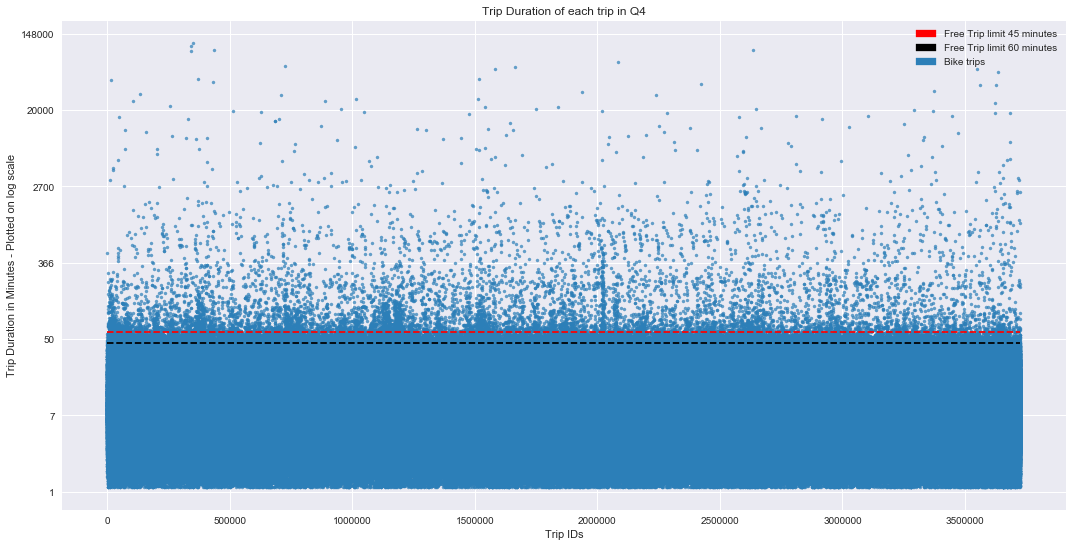

In [6]:
# Plot Trip Duration of each trip and show the threshold of free trip limit of 45 minutes for Subscribers

import matplotlib.patches as mpatches

# we need to create the log scale for trip duration to fit in uniform scale.
df_sub["logtripduration"] = np.log(df_sub["tripduration"])

df_sub.plot.scatter(x='trip_id', y='logtripduration', figsize=(18, 9), color='#2c7fb8', alpha=.7, linewidth=.2, label='Bike trips', s=10);

# draw two line to show the limit of free trip duration 45 minutes - log(45*60) and 60 minutes.
# log value of 2700 (45 minutes - free trip threshold) is 7.901 and log value of 3000 is 8.189

plt.plot([0, len(df_sub['trip_id'])], [7.90, 7.90], 'k--', color="Black")
plt.plot([0, len(df_sub['trip_id'])], [8.19, 8.19], 'k--', color="Red")
_ = plt.xlabel('Trip IDs')
_ = plt.ylabel('Trip Duration in Minutes - Plotted on log scale')
_ = plt.title('Trip Duration of each trip in Q4')

tick_val = [4,6,8,10,12,14,16]
tick_lab = ['1','7','50','366','2700','20000','148000']
_ = plt.yticks(tick_val, tick_lab)

red_patch = mpatches.Patch(color='red', label='Free Trip limit 45 minutes')
blk_patch = mpatches.Patch(color='Black', label='Free Trip limit 60 minutes')
blue_patch = mpatches.Patch(color='#2c7fb8', label='Bike trips')

plt.legend(handles=[red_patch,blk_patch,blue_patch])

plt.show()


###### ** We have used log scale to tune the long tail of trip duration. Area under 45 minutes and 60 minutes limit is of equally high density. there are many outliers of trips duration upto multiple Days.

Average No of trips originating per Station in Q4 by Subscribers 4827.0


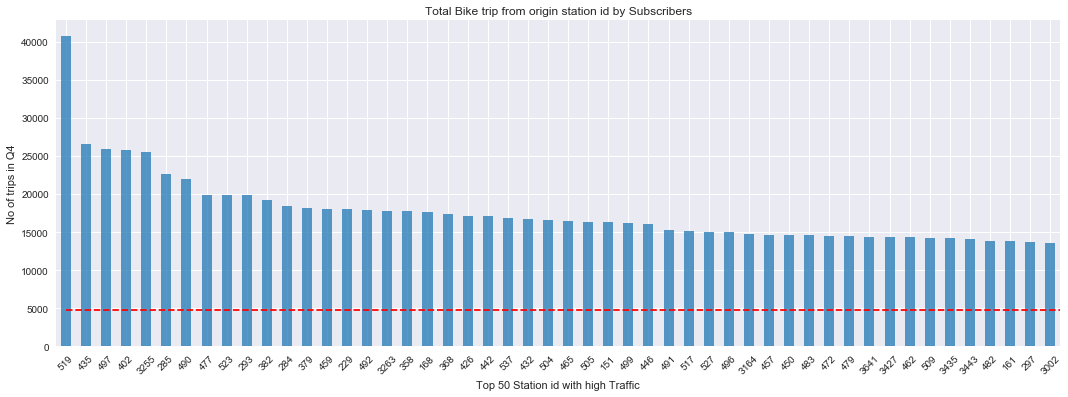

Average No of Paid trips originating per Station in Q4 by subscribers 34.0


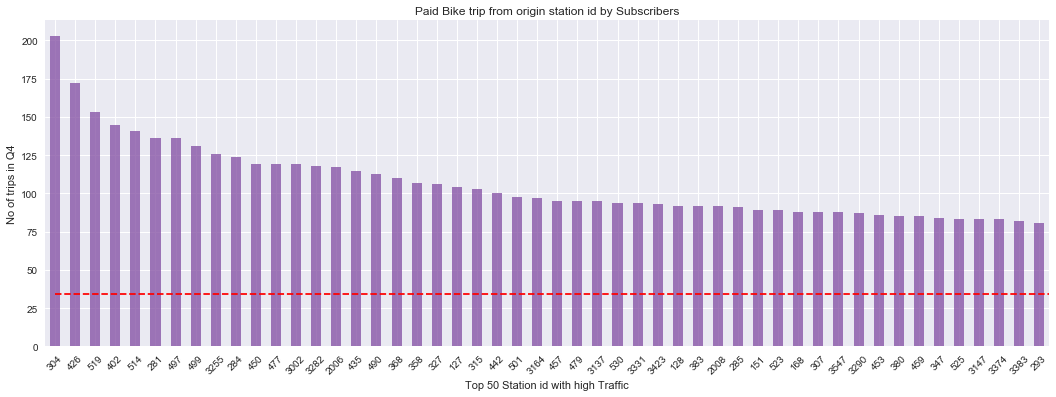

Average No of Paid trips originating per Station in Q4 by Customers 15.0


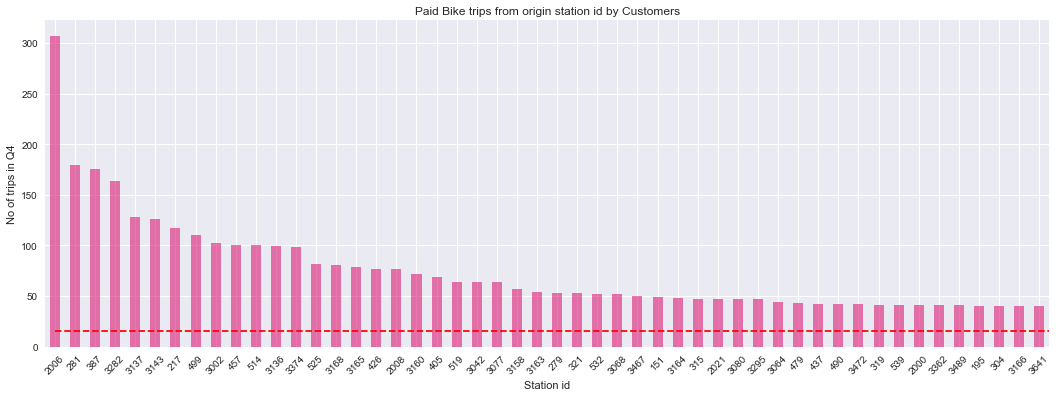

In [7]:
# Trip Origination Distribution by Station id: where are all trip starting from 

newdf1 = df_sub[['start_id']].groupby(df_sub['start_id']).count()
newdf1 = newdf1.rename(index=str, columns={"start_id": 'counts'})

av_trips_from_a_station = np.around(len(df_sub['trip_id'])/(len(newdf1['counts'])))
print("Average No of trips originating per Station in Q4 by Subscribers", av_trips_from_a_station)

#lets get top 30 Stattions based on no of trips

newdf = newdf1.nlargest(50, 'counts')

newdf.plot(kind='bar', figsize=(18, 6), label = '', legend=False, color='#2c7fb8', linewidth=.01, alpha=0.8)
plt.plot([0, len(newdf['counts'])], [av_trips_from_a_station, av_trips_from_a_station], 'k--', color="Red",)

plt.xlabel('Top 50 Station id with high Traffic')
plt.ylabel('No of trips in Q4')
_ = plt.xticks(rotation=45)
plt.title('Total Bike trip from origin station id by Subscribers')
plt.show()

#---------------------------------------------------------------------------------------------------#
# Trip Origination Distribution by Station id: Where are the long(paid) trips happening by subscriber
# Find the paid trips (> 45 minutes) and show in plot when and where they are starting from.

df_paidtrip = df_sub.query("tripduration > 2700")
newdf = df_paidtrip[['start_id']].groupby(df_paidtrip['start_id']).count()
newdf = newdf.rename(index=str, columns={"start_id": 'counts'})

newdf_p = newdf.nlargest(50, 'counts')

av_paidtrip_from_a_station_bysub = np.around(len(df_paidtrip['trip_id'])/(len(newdf['counts'])))
print("Average No of Paid trips originating per Station in Q4 by subscribers", av_paidtrip_from_a_station_bysub)

newdf_p.plot(kind='bar', figsize=(18, 6), label = '', legend=False, color='#8856a7', linewidth=.1, alpha=0.8)
plt.plot([0, len(newdf_p['counts'])], [av_paidtrip_from_a_station_bysub, av_paidtrip_from_a_station_bysub], 'k--', color="Red",)
_ = plt.xticks(rotation=45)

plt.xlabel('Top 50 Station id with high Traffic')
plt.ylabel('No of trips in Q4')
plt.title('Paid Bike trip from origin station id by Subscribers')
plt.show()

#---------------------------------------------------------------------------------------------------#
# Trip Origination Distribution by Station id: Where are the long(paid) trips happening by Customers
# For 1-Day or 3-Day pass holders

df_custpaidtrip = df_cust.query("tripduration > 1800")

newdf = df_custpaidtrip[['start_id']].groupby(df_custpaidtrip['start_id']).count()
newdf = newdf.rename(index=str, columns={"start_id": 'counts'})

newdf_pc = newdf.nlargest(50, 'counts')

av_paidtrip_from_a_station_bycust = np.around(len(df_custpaidtrip['trip_id'])/(len(newdf['counts'])))
print("Average No of Paid trips originating per Station in Q4 by Customers", av_paidtrip_from_a_station_bycust)

newdf_pc.plot(kind='bar', figsize=(18, 6), label = '', legend=False, color='#dd1c77', linewidth=.1, alpha=0.6)
plt.plot([0, len(newdf_pc['counts'])], [av_paidtrip_from_a_station_bycust, av_paidtrip_from_a_station_bycust], 'k--', color="Red",)
_ = plt.xticks(rotation=45)

plt.xlabel('Station id')
plt.ylabel('No of trips in Q4')
plt.title('Paid Bike trips from origin station id by Customers')
plt.show()

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Average no of long trips by Day/Hour for subscriber  153.0
Average no of long trips by Day/Hour for customer  64.0


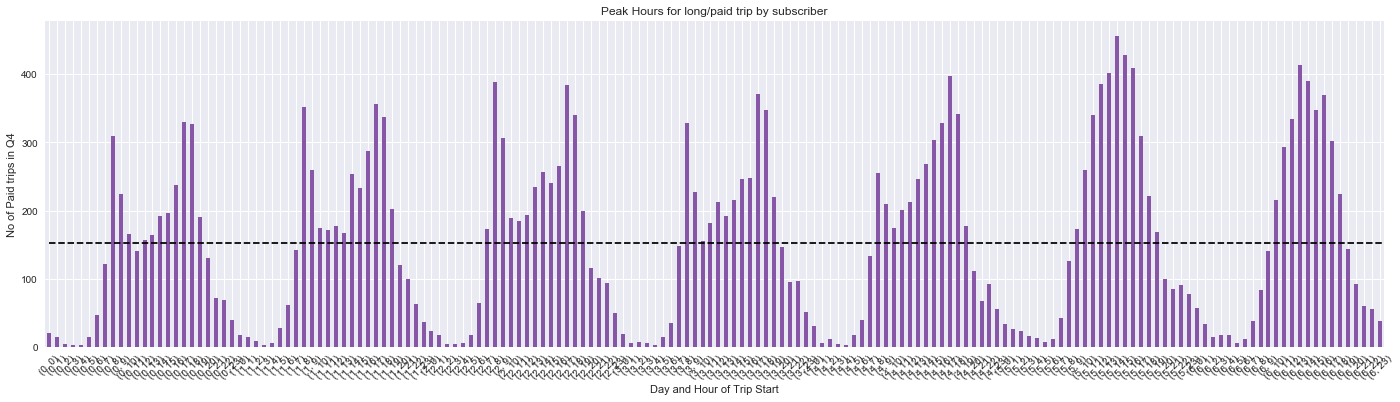

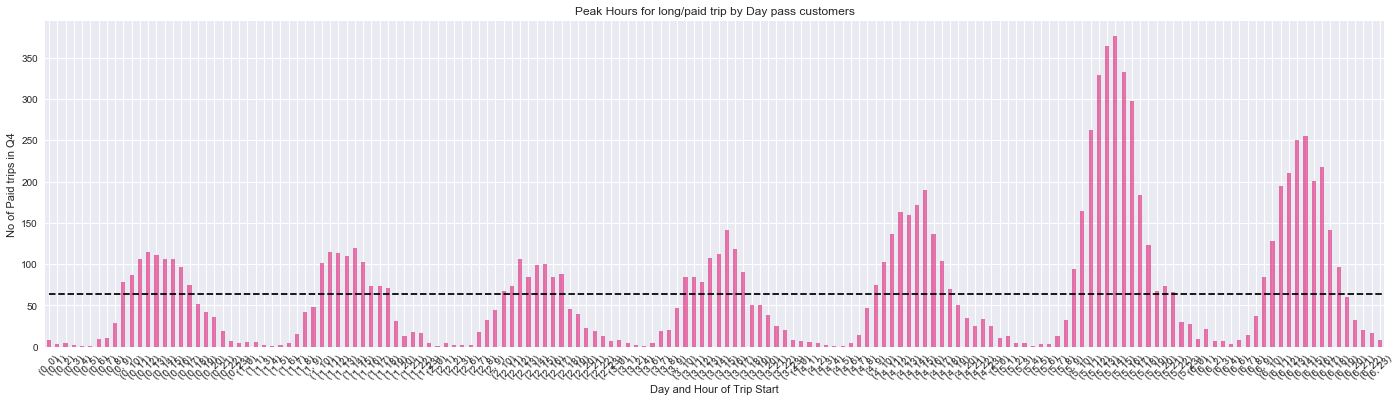

In [8]:
# Paid Trip Distribution by Day/Time of a week: When are the paid trips happening

df_paidtrip['paidunits'] = np.floor((df_paidtrip['tripduration']-2700)/900)
av_paid_trips_per_hour = np.around(len(df_paidtrip['paidunits'])/(24*7))

df_agg_hour_day = pd.pivot_table(df_paidtrip, values='trip_id', index=([df_paidtrip['start_day'], df_paidtrip['starthour']]), aggfunc=np.count_nonzero)
df_agg_hour_day.plot(kind='bar', xticks=df_paidtrip.start_day, figsize=(24, 6), label = '', legend=False, color='#8856a7', linewidth=.08)
plt.plot([0, 168], [av_paid_trips_per_hour, av_paid_trips_per_hour], 'k--', color="black",)

plt.xlabel('Day and Hour of Trip Start')
plt.ylabel('No of Paid trips in Q4')
plt.title('Peak Hours for long/paid trip by subscriber')
plt.xticks(rotation=45)


#Trip Distribution by Day/Time of a week: When are the paid trips happening by Day pass customers
df_custpaidtrip['paidunits'] = np.floor((df_custpaidtrip['tripduration']-1800)/900)
av_paid_trips_per_hour_cust = np.around(len(df_custpaidtrip['paidunits'])/(24*7))

df_agg_hour_day_cust = pd.pivot_table(df_custpaidtrip, values='trip_id', index=([df_custpaidtrip['start_day'], df_custpaidtrip['starthour']]), aggfunc=np.count_nonzero)
df_agg_hour_day_cust.plot(kind='bar', xticks=df_custpaidtrip.start_day, figsize=(24, 6), label = '', legend=False, color='#dd1c77', linewidth=.1, alpha=0.6)
plt.plot([0, 168], [av_paid_trips_per_hour_cust, av_paid_trips_per_hour_cust], 'k--', color="black",)

plt.xlabel('Day and Hour of Trip Start')
plt.ylabel('No of Paid trips in Q4')
plt.title('Peak Hours for long/paid trip by Day pass customers')
plt.xticks(rotation=45)


print("Average no of long trips by Day/Hour for subscriber ", av_paid_trips_per_hour)
print("Average no of long trips by Day/Hour for customer ", av_paid_trips_per_hour_cust)


###### ** Subscribers trips count is little more than average during Rush Hours in weekdays and afternoon in weekend. less Deviation.
###### ** For Day pass Holder trips count is less  than average during weekdays and mush high in afternoon in weekend. More Deviation.


Average trips duration by Subscribers 771.0


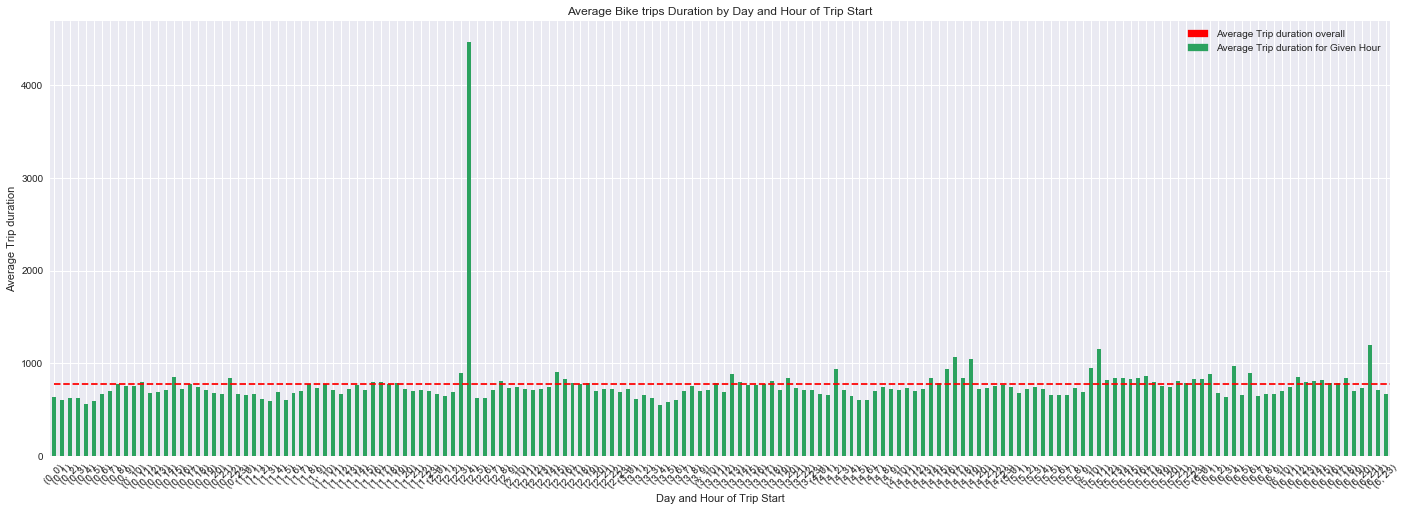

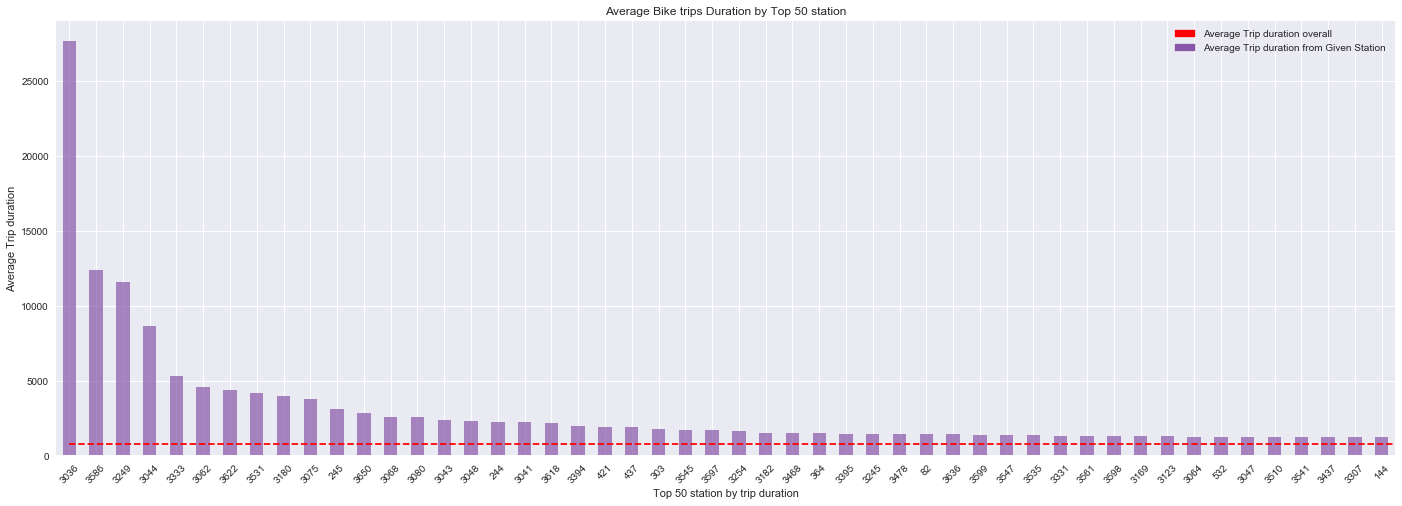

In [9]:
#Trip Duration over the Day/time of a week:

av_trips_duration = np.around(np.sum(df_sub['tripduration'])/len(df_sub['trip_id']))
print("Average trips duration by Subscribers", av_trips_duration)

df_agg_hour_day = pd.pivot_table(df_sub, values='tripduration', index=([df_sub['start_day'], df_sub['starthour']]), aggfunc=np.mean)
df_agg_hour_day.plot(kind='bar', xticks=df_paidtrip.start_day, figsize=(24, 8), label = '', legend=False, color='#2ca25f', linewidth=.05)

plt.plot([0, 168], [av_trips_duration, av_trips_duration], 'k--', color="Red",)

plt.xlabel('Day and Hour of Trip Start')
plt.ylabel('Average Trip duration')
plt.title('Average Bike trips Duration by Day and Hour of Trip Start')
_ = plt.xticks(rotation=45)

red_patch = mpatches.Patch(color='red', label='Average Trip duration overall')
blk_patch = mpatches.Patch(color='#2ca25f', label='Average Trip duration for Given Hour')

plt.legend(handles=[red_patch,blk_patch])

plt.show()

#Trip Duration by the origination station:

df_agg_station = pd.pivot_table(df_sub, values='tripduration', index=([df_sub['start_id']]), aggfunc=np.mean)
df_agg_station = df_agg_station.rename(index=str, columns={"tripduration": 'meanduration'})

newdf_p = df_agg_station.nlargest(50, 'meanduration')

newdf_p.plot(kind='bar', xticks=df_paidtrip.start_day, figsize=(24, 8), label = '', legend=False, color='#8856a7', linewidth=.05, alpha=0.7)

plt.plot([0, 168], [av_trips_duration, av_trips_duration], 'k--', color="Red",)

plt.xlabel('Top 50 station by trip duration')
plt.ylabel('Average Trip duration')
plt.title('Average Bike trips Duration by Top 50 station')
_ = plt.xticks(rotation=45)

red_patch = mpatches.Patch(color='red', label='Average Trip duration overall')
blk_patch = mpatches.Patch(color='#8856a7', label='Average Trip duration from Given Station')

plt.legend(handles=[red_patch,blk_patch])

plt.show()


###### ** Hourly Average tirp duration by Subscriber is pretty much close to average except 1 outlier. Normal Distribution.
###### ** Hourly Average tirp duration by Subscriber is pretty high compared to avrage value from few stations.


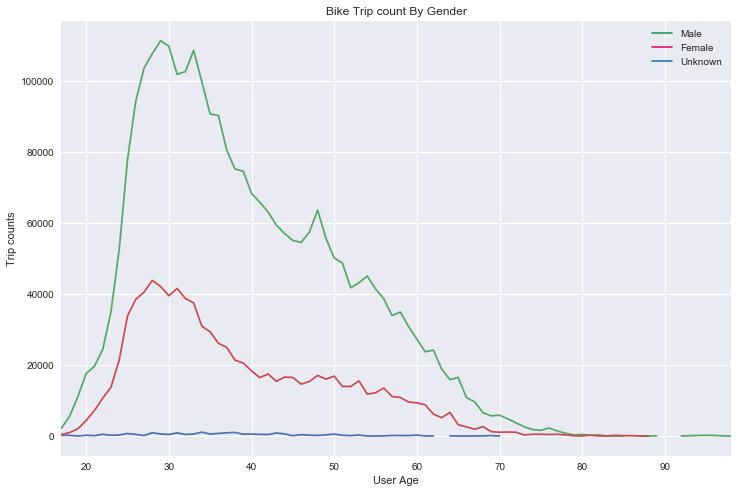

In [10]:
# Plot Bike Trip distribution By Gender and Age

df_agg_trips = pd.pivot_table(df_sub, values='bikeid', index=df_sub['driver_age'], columns=['gender'], aggfunc=np.count_nonzero)
df_agg_trips.plot(figsize=(12,8), title='Bike Trip count By Gender')
_ = plt.ylabel('Trip counts')
_ = plt.xlabel('User Age')

male, = plt.plot([1,2,3], color='#2ca25f', label='Male')
female, = plt.plot([3,2,1],  color='#dd1c77', label='Female')
othr, = plt.plot([3,2,1],  color='#3182bd', label='Unknown')
plt.legend([male, female, othr], ['Male', 'Female', 'Unknown'])


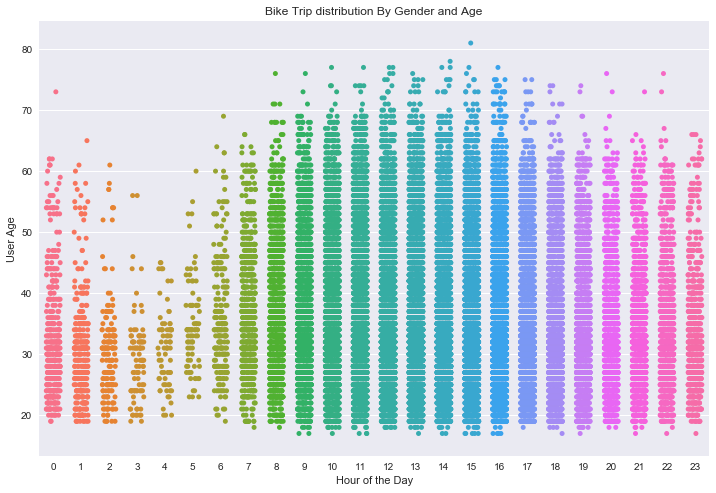

In [11]:

plt.figure(figsize=(12,8))
sns.stripplot(x="starthour", y="driver_age", data=df_cust, jitter=.25, palette="husl");
_ = plt.xlabel('Hour of the Day')
_ = plt.ylabel('User Age')
_ = plt.title('Bike Trip distribution By Gender and Age')

plt.show()

######  Male from 25-35 age is most common user segment for Subscribers. Younger users are taking trips during late night hours also.

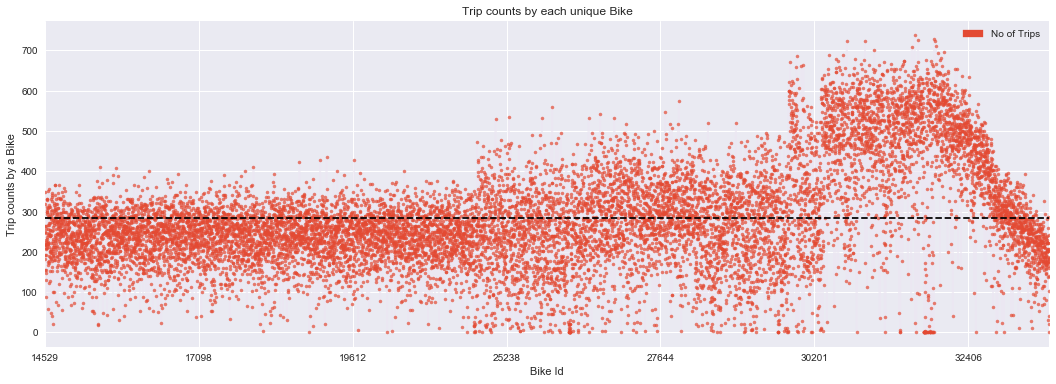

In [12]:
# Plot Trip counts by Bike Ids

newdf = df_sub[['bikeid']].groupby(df_sub['bikeid']).count()
#newdf1 = df_sub[['bikeid']].groupby(df_sub['tripduration']).sum()

newdf = newdf.rename(index=str, columns={"bikeid": 'counts'})

av_trips_per_bike = np.around(len(df_sub['trip_id'])/len(newdf['counts']))

newdf.plot(kind='line', figsize=(18, 6), label = '', marker='.', markerfacecolor='#e34a33', legend=False, color='#ece7f2',alpha=0.7)
plt.plot([0, len(newdf['counts'])], [av_trips_per_bike, av_trips_per_bike], 'k--', color="Black",)

_ = plt.xlabel('Bike Id')
_ = plt.ylabel('Trip counts by a Bike')
#_ = plt.xticks(rotation=45)
_ = plt.title('Trip counts by each unique Bike')

bikes = mpatches.Patch(color='#e34a33', label='No of Trips')
plt.legend(handles=[bikes])

plt.show()


** Few bikes in the bike range of 30200-32400 are taking more than double trips than average**

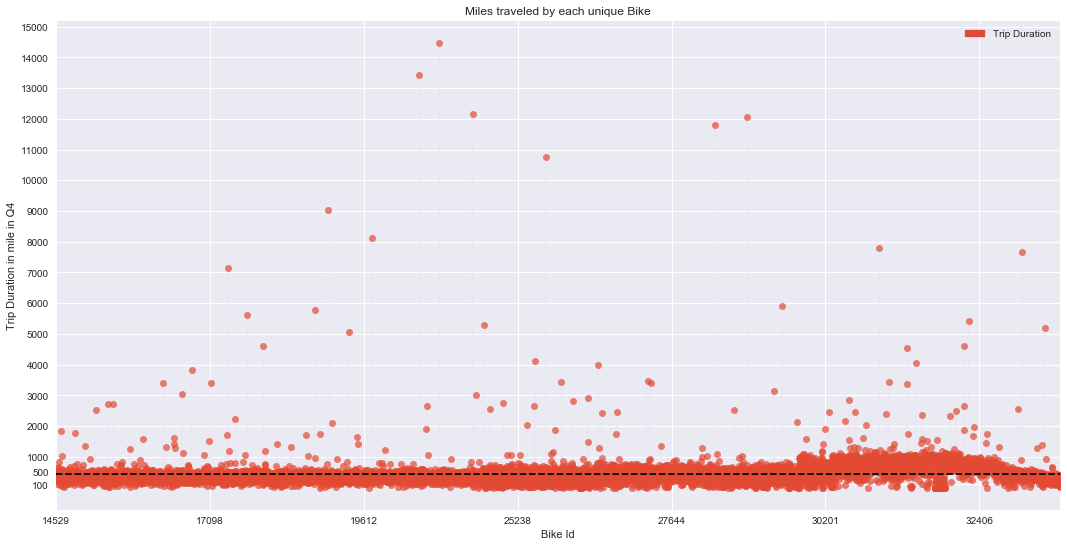

In [13]:
# Plot Trip counts by Bike Ids

newdf1 = df_sub[['tripduration']].groupby(df_sub['bikeid']).sum()
newdf1 = newdf1.rename(index=str, columns={"bikeid": 'totaltime'})
newdf1['miles'] = np.floor(newdf1['tripduration']*0.0020712)

av_mile_per_bike = np.around(np.sum(newdf1['miles'])/len(newdf1))

newdf1['miles'].plot(kind='line', figsize=(18, 9), label = '', marker='o', markerfacecolor='#e34a33', legend=False, color='#ece7f2',alpha=0.7)
plt.plot([0, len(newdf1)], [av_mile_per_bike, av_mile_per_bike], 'k--', color="Black",)

_ = plt.xlabel('Bike Id')
_ = plt.ylabel('Trip Duration in mile in Q4')
_ = plt.title('Miles traveled by each unique Bike')
yint = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
plt.yticks(yint)
bikes = mpatches.Patch(color='#e34a33', label='Trip Duration')
plt.legend(handles=[bikes])

plt.show()


###### **  While most bikes are taking less trips then overall average, Some bikes are traveling more distance than average (almost double) . These may be due for major upgrades.

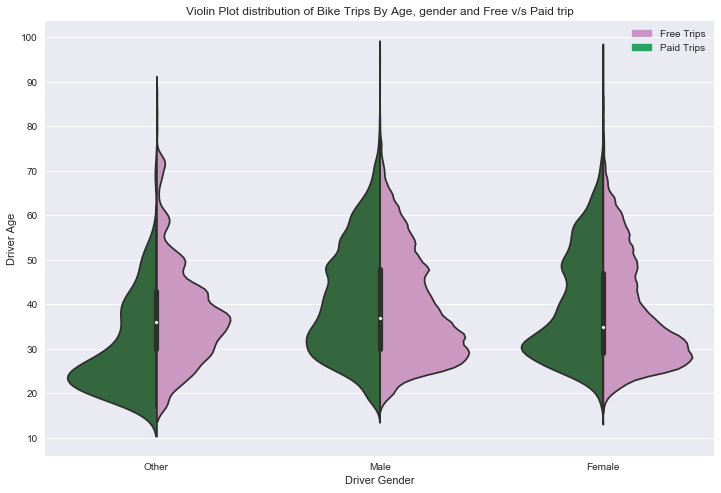

In [14]:
# Plot Bike Trip distribution By Gender, Age and paid v/s Free Trips

plt.figure(figsize=(12,8))

_ = plt.title('Violin Plot distribution of Bike Trips By Age, gender and Free v/s Paid trip')
yint = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.yticks(yint)
ax = sns.violinplot(x="gender", y="driver_age", hue="free_trip", data=df_sub, split=True, palette="cubehelix", legend_out = False);
ax.set_xticklabels(['Other', 'Male', 'Female'])

free_patch = mpatches.Patch(color='#c994c7', label='Free Trips')
paid_patch = mpatches.Patch(color='#2ca25f', label='Paid Trips')

plt.legend(handles=[free_patch, paid_patch])
_ = plt.xlabel('Driver Gender')
_ = plt.ylabel('Driver Age')

plt.show()

** Ratio distribution of free and paid trip varies by gender. younger female are taking more paid trips **

In [15]:
# Track and Plot Bike Movement In Peak Hours

df_hourly_bike_departs = df_sub.groupby(['start_id','startdate', 'starthour'], as_index=False).agg({'tripduration': 'sum', 'bikeid':'nunique', 'trip_id':'count', 'paidunits':'sum' })
df_hourly_bike_departs = df_hourly_bike_departs.rename(index=str, columns={"tripduration": 'total_trip_time_depart', "bikeid": "no_of_bikes_departs", "trip_id": "no_of_trips_depart"})

df_hourly_bike_arrive = df_sub.groupby(['end_id','enddate', 'endhour'], as_index=False).agg({'tripduration': 'sum', 'bikeid':'nunique', 'trip_id':'count', 'paidunits':'sum' })
df_hourly_bike_arrive = df_hourly_bike_arrive.rename(index=str, columns={"tripduration": 'total_trip_time_arrive', "bikeid": "no_of_bikes_arrive", "trip_id": "no_of_trips_arrive"})

df_hourly_bikes = []
df_hourly_bikes = pd.concat([df_hourly_bike_departs, df_hourly_bike_arrive], axis=1)
df_hourly_bikes['bike_moved'] = df_hourly_bikes['no_of_bikes_arrive'] - df_hourly_bikes['no_of_bikes_departs'] 

df_hourly_bikes.set_index(['startdate', 'starthour'], append=True)
pd.to_numeric(df_hourly_bikes['start_id'], errors='coerce')
df_hourly_bikes = df_hourly_bikes.dropna(subset = ['start_id'])
df_hourly_bikes['start_id'] = df_hourly_bikes['start_id'].astype(int)
df_hourly_bikes['starthour'] = df_hourly_bikes['starthour'].astype(int)

df_hourly_bikes = df_hourly_bikes[df_hourly_bikes['starthour'].isin(['7','8','9','16','17','18'])]


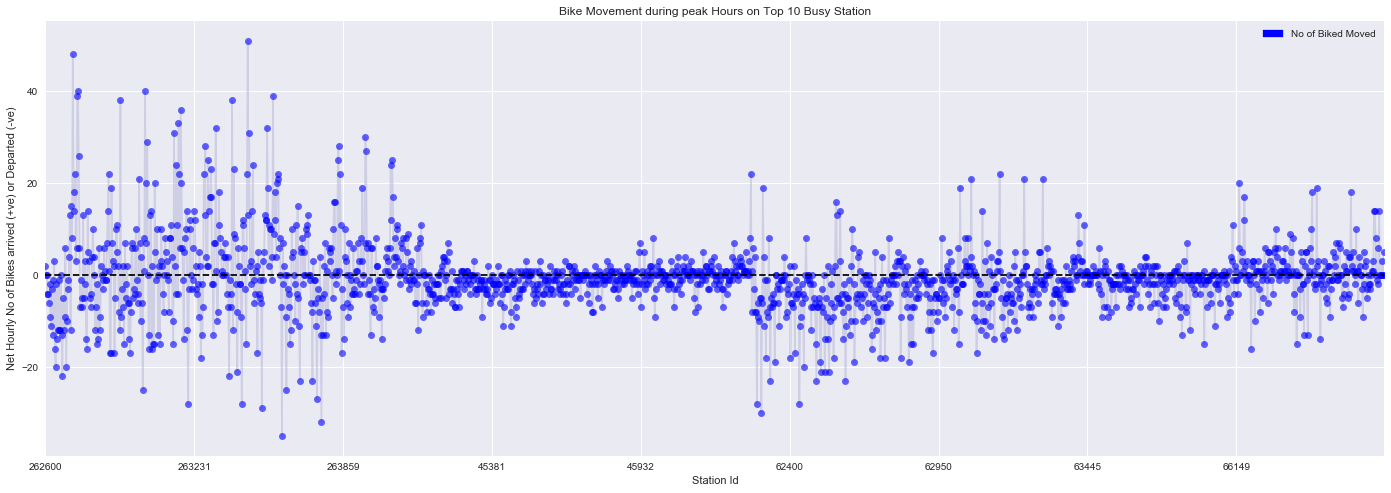

In [16]:
# Track and Plot Bike Movement In Peak Hours

newdf1 = df_sub[['start_id']].groupby(df_sub['start_id'], as_index=False).count()
newdf1 = newdf1.rename(index=str, columns={"start_id": 'counts'})

#lets get top 10 Stattions based on no of trips

newdf = newdf1.nlargest(10, 'counts')
newdf.reset_index(inplace=True)
newdf = newdf.rename(index=str, columns={"index": 'station_id'})

df = df_hourly_bikes[df_hourly_bikes['start_id'].isin(newdf['station_id'])]

plt.figure(figsize=(24,8))
df['bike_moved'].plot(color = '#bcbddc', marker = 'o', markerfacecolor = 'blue', alpha = 0.6)
plt.plot([0, len(df)], [0, 0], 'k--', color="Black",)

_ = plt.xlabel('Station Id')
_ = plt.ylabel('Net Hourly No of Bikes arrived (+ve) or Departed (-ve)')
_ = plt.title('Bike Movement during peak Hours on Top 10 Busy Station')
bikes = mpatches.Patch(color='blue', label='No of Biked Moved')

plt.legend(handles=[bikes])


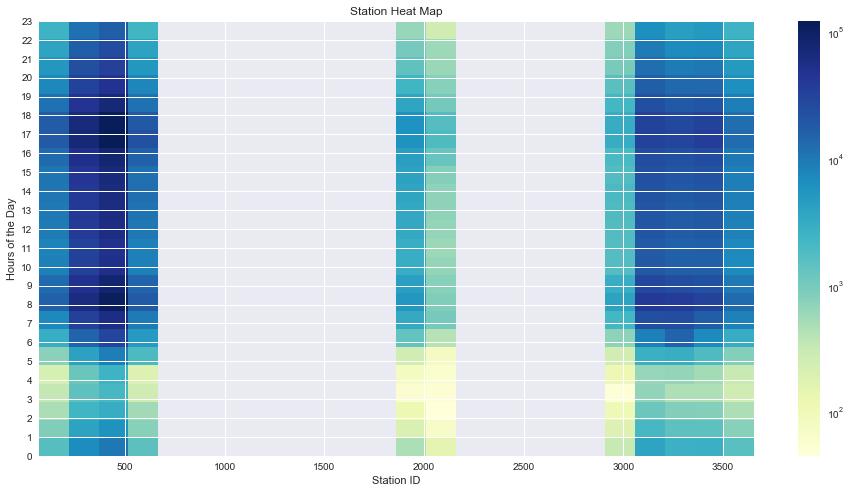

In [17]:
# Create a Heat map to show which station is busy againt the hour of the day.

from matplotlib.colors import LogNorm

plt.figure(figsize=(16,8))
plt.hist2d(x=df_sub.start_id, y=df_sub.starthour, bins=24, norm=LogNorm(), cmap = 'YlGnBu')
plt.title("Station Heat Map")
plt.xlabel("Station ID")
plt.ylabel("Hours of the Day")
tick_val = np.arange(24)
tick_lab = np.arange(24)
_ = plt.yticks(tick_val, tick_lab)
plt.xticks=df_sub[['start_id']]

plt.colorbar()
plt.show()
